In [2]:
def generate_multiuser_ris_dataset(U=4, N=64, num_samples=10000, L_paths=5, snr_range=range(0, 31, 5)):
    dataset = []
    for snr_db in snr_range:
        snr_linear = 10 ** (snr_db / 10)
        noise_std = np.sqrt(1 / (2 * snr_linear))
        for _ in range(num_samples // len(snr_range)):
            theta = np.random.uniform(0, 2*np.pi, N)
            Q = np.diag(np.exp(1j * theta))  # RIS phase matrix [N×N]

            H_all = []
            y_all = []

            for _ in range(U):
                G = generate_sv_channel(L_paths, 1, N)        # BS→RIS: 1×N
                F = generate_sv_channel(L_paths, N, 1)        # RIS→User: N×1

                H = F.T @ Q @ G.T                             # H scalar
                y = H + noise_std * (np.random.randn() + 1j * np.random.randn())

                h_vec = (F.T @ Q).flatten() * G.flatten()     # Compressed channel vector
                H_all.append(h_vec)
                y_all.append(y)

            dataset.append({
                "H_real": np.real(H_all),
                "H_imag": np.imag(H_all),
                "y_real": np.real(y_all),
                "y_imag": np.imag(y_all),
                "snr_db": snr_db
            })
    return dataset


In [4]:
data = generate_multiuser_ris_dataset()

np.savez("ris_multiuser_dataset.npz",
         H_real=np.array([d['H_real'] for d in data]),   # shape: (samples, U, N)
         H_imag=np.array([d['H_imag'] for d in data]),
         y_real=np.array([d['y_real'] for d in data]),
         y_imag=np.array([d['y_imag'] for d in data]),
         snr_db=np.array([d['snr_db'] for d in data]))

print("✅ Saved multi-user RIS dataset.")


NameError: name 'np' is not defined

In [6]:
import numpy as np


In [8]:
def generate_multiuser_ris_dataset(U=4, N=64, num_samples=10000, L_paths=5, snr_range=range(0, 31, 5)):
    dataset = []
    for snr_db in snr_range:
        snr_linear = 10 ** (snr_db / 10)
        noise_std = np.sqrt(1 / (2 * snr_linear))
        for _ in range(num_samples // len(snr_range)):
            theta = np.random.uniform(0, 2*np.pi, N)
            Q = np.diag(np.exp(1j * theta))  # RIS phase matrix

            H_all, y_all = [], []
            for _ in range(U):
                G = generate_sv_channel(L_paths, 1, N)
                F = generate_sv_channel(L_paths, N, 1)
                H = F.T @ Q @ G.T
                y = H + noise_std * (np.random.randn() + 1j * np.random.randn())
                h_vec = (F.T @ Q).flatten() * G.flatten()
                H_all.append(h_vec)
                y_all.append(y)

            dataset.append({
                "H_real": np.real(H_all),
                "H_imag": np.imag(H_all),
                "y_real": np.real(y_all),
                "y_imag": np.imag(y_all),
                "snr_db": snr_db
            })
    return dataset


In [10]:
data = generate_multiuser_ris_dataset()


NameError: name 'generate_sv_channel' is not defined

In [12]:
def array_response(angle, size, d=0.05, wavelength=0.1):
    k = 2 * np.pi / wavelength
    return np.exp(1j * k * d * np.arange(size) * np.sin(angle))

def generate_sv_channel(num_paths, tx_size, rx_size):
    H = np.zeros((rx_size, tx_size), dtype=complex)
    for _ in range(num_paths):
        alpha = (np.random.randn() + 1j*np.random.randn()) / np.sqrt(2)
        theta_t = np.random.uniform(-np.pi/2, np.pi/2)
        theta_r = np.random.uniform(-np.pi/2, np.pi/2)
        at = array_response(theta_t, tx_size)
        ar = array_response(theta_r, rx_size)
        H += alpha * np.outer(ar, at.conj())
    return H


In [14]:
data = generate_multiuser_ris_dataset()


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 64 is different from 1)

In [16]:
import numpy as np

# --- Helper functions ---
def array_response(angle, size, d=0.05, wavelength=0.1):
    k = 2 * np.pi / wavelength
    return np.exp(1j * k * d * np.arange(size) * np.sin(angle))

def generate_sv_channel(num_paths, tx_size, rx_size):
    H = np.zeros((rx_size, tx_size), dtype=complex)
    for _ in range(num_paths):
        alpha = (np.random.randn() + 1j*np.random.randn()) / np.sqrt(2)
        theta_t = np.random.uniform(-np.pi/2, np.pi/2)
        theta_r = np.random.uniform(-np.pi/2, np.pi/2)
        at = array_response(theta_t, tx_size)
        ar = array_response(theta_r, rx_size)
        H += alpha * np.outer(ar, at.conj())
    return H

# --- Main generator function ---
def generate_multiuser_ris_dataset(U=4, N=64, num_samples=10000, L_paths=5, snr_range=range(0, 31, 5)):
    dataset = []
    for snr_db in snr_range:
        snr_linear = 10 ** (snr_db / 10)
        noise_std = np.sqrt(1 / (2 * snr_linear))

        for _ in range(num_samples // len(snr_range)):
            theta = np.random.uniform(0, 2*np.pi, N)
            Q = np.diag(np.exp(1j * theta))  # RIS phase matrix

            H_all, y_all = [], []

            for _ in range(U):
                G = generate_sv_channel(L_paths, 1, N)  # BS→RIS
                F = generate_sv_channel(L_paths, N, 1)  # RIS→User

                H = F.T @ Q @ G  # ✅ shape: (1×1)
                y = H + noise_std * (np.random.randn() + 1j * np.random.randn())

                h_vec = (F.T @ Q).flatten() * G.flatten()  # compressed vector: shape (N,)
                H_all.append(h_vec)
                y_all.append(y)

            dataset.append({
                "H_real": np.real(H_all),   # shape: (U, N)
                "H_imag": np.imag(H_all),
                "y_real": np.real(y_all),   # shape: (U,)
                "y_imag": np.imag(y_all),
                "snr_db": snr_db
            })

    return dataset


In [18]:
data = generate_multiuser_ris_dataset()

np.savez("ris_multiuser_dataset.npz",
         H_real=np.array([d['H_real'] for d in data]),   # shape: (samples, U, N)
         H_imag=np.array([d['H_imag'] for d in data]),
         y_real=np.array([d['y_real'] for d in data]),
         y_imag=np.array([d['y_imag'] for d in data]),
         snr_db=np.array([d['snr_db'] for d in data]))

print("✅ Multi-user RIS dataset saved as 'ris_multiuser_dataset.npz'")


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 64 is different from 1)

In [20]:
def generate_multiuser_ris_dataset(U=4, N=64, num_samples=10000, L_paths=5, snr_range=range(0, 31, 5)):
    dataset = []
    for snr_db in snr_range:
        snr_linear = 10 ** (snr_db / 10)
        noise_std = np.sqrt(1 / (2 * snr_linear))

        for _ in range(num_samples // len(snr_range)):
            theta = np.random.uniform(0, 2*np.pi, N)
            Q = np.diag(np.exp(1j * theta))

            H_all, y_all = [], []

            for _ in range(U):
                G = generate_sv_channel(L_paths, N, 1)  # ✅ FIXED
                F = generate_sv_channel(L_paths, N, 1)

                H = F.T @ Q @ G  # ✅ (1×N) @ (N×N) @ (N×1) = (1×1)
                y = H + noise_std * (np.random.randn() + 1j * np.random.randn())

                h_vec = (F.T @ Q).flatten() * G.flatten()
                H_all.append(h_vec)
                y_all.append(y)

            dataset.append({
                "H_real": np.real(H_all),
                "H_imag": np.imag(H_all),
                "y_real": np.real(y_all),
                "y_imag": np.imag(y_all),
                "snr_db": snr_db
            })

    return dataset


In [22]:
data = generate_multiuser_ris_dataset()

np.savez("ris_multiuser_dataset.npz",
         H_real=np.array([d['H_real'] for d in data]),
         H_imag=np.array([d['H_imag'] for d in data]),
         y_real=np.array([d['y_real'] for d in data]),
         y_imag=np.array([d['y_imag'] for d in data]),
         snr_db=np.array([d['snr_db'] for d in data]))

print("✅ Multi-user RIS dataset saved.")


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 64 is different from 1)

In [24]:
def generate_multiuser_ris_dataset(U=4, N=64, num_samples=10000, L_paths=5, snr_range=range(0, 31, 5)):
    dataset = []
    for snr_db in snr_range:
        snr_linear = 10 ** (snr_db / 10)
        noise_std = np.sqrt(1 / (2 * snr_linear))

        for _ in range(num_samples // len(snr_range)):
            theta = np.random.uniform(0, 2*np.pi, N)
            Q = np.diag(np.exp(1j * theta))  # (N, N)

            H_all, y_all = [], []

            for _ in range(U):
                G = generate_sv_channel(L_paths, 1, N)  # ✅ G: (64, 1)
                F = generate_sv_channel(L_paths, N, 1)  # ✅ F: (1, 64)

                H = F @ Q @ G  # (1, 64) @ (64, 64) @ (64, 1) → (1, 1)
                y = H + noise_std * (np.random.randn() + 1j * np.random.randn())

                h_vec = (F @ Q).flatten() * G.flatten()  # (64,)
                H_all.append(h_vec)
                y_all.append(y)

            dataset.append({
                "H_real": np.real(H_all),   # shape: (U, N)
                "H_imag": np.imag(H_all),
                "y_real": np.real(y_all),
                "y_imag": np.imag(y_all),
                "snr_db": snr_db
            })

    return dataset


In [26]:
data = generate_multiuser_ris_dataset()

np.savez("ris_multiuser_dataset.npz",
         H_real=np.array([d['H_real'] for d in data]),
         H_imag=np.array([d['H_imag'] for d in data]),
         y_real=np.array([d['y_real'] for d in data]),
         y_imag=np.array([d['y_imag'] for d in data]),
         snr_db=np.array([d['snr_db'] for d in data]))

print("✅ Multi-user RIS dataset saved.")


✅ Multi-user RIS dataset saved.


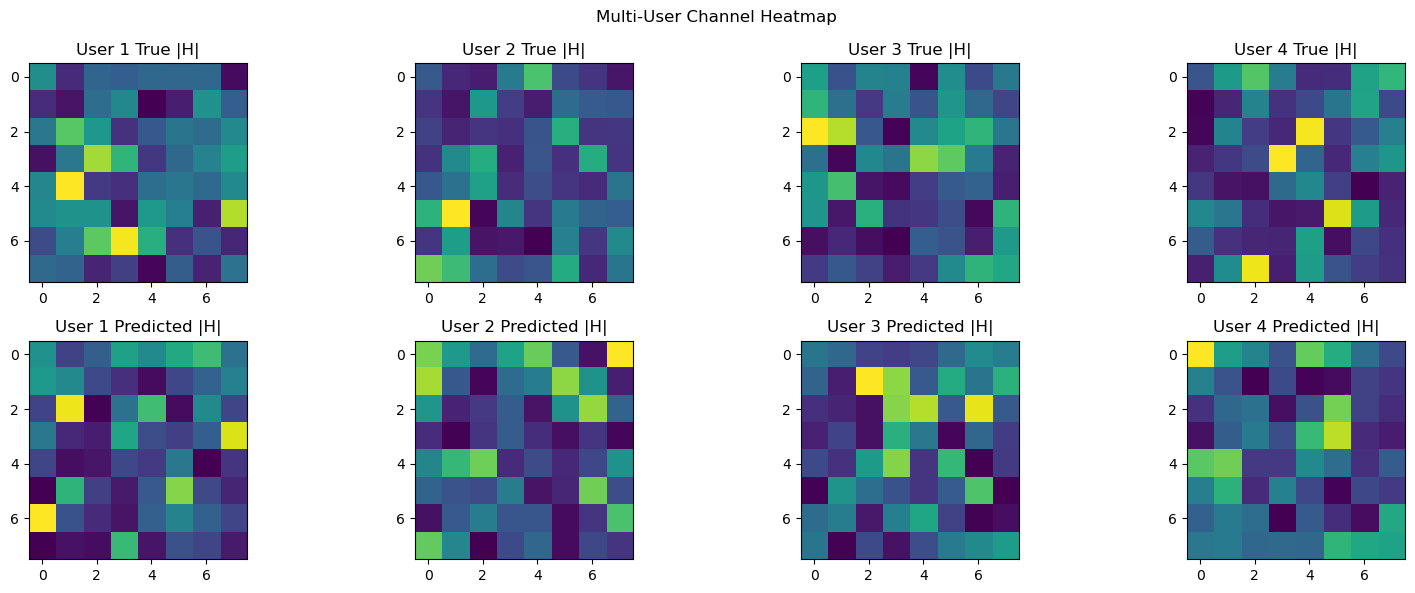

In [34]:
import matplotlib.pyplot as plt
import numpy as np  # Also ensure NumPy is imported if not already

# Example placeholders (replace with your actual data)
U = 4  # number of users
true_H = np.random.randn(U, 64)  # Replace with your true channel matrix
pred_H = np.random.randn(U, 64)  # Replace with your predicted channel matrix

# Plot per-user true vs predicted H
fig, axes = plt.subplots(2, U, figsize=(16, 6))
for u in range(U):
    axes[0, u].imshow(np.abs(true_H[u].reshape(8, 8)), cmap='viridis')
    axes[0, u].set_title(f"User {u+1} True |H|")

    axes[1, u].imshow(np.abs(pred_H[u].reshape(8, 8)), cmap='viridis')
    axes[1, u].set_title(f"User {u+1} Predicted |H|")

plt.suptitle("Multi-User Channel Heatmap")
plt.tight_layout()
plt.show()

In [38]:
import numpy as np

# Number of RIS elements (e.g., 64 for an 8x8 RIS)
N = 64

# Simulate continuous phase shifts (0 to 2π)
theta = np.random.uniform(0, 2 * np.pi, size=N)

# Apply 2-bit quantization (4 levels: 0, π/2, π, 3π/2)
quantized_theta = np.round(theta / (2 * np.pi / 4)) * (2 * np.pi / 4)

# Optional: wrap into [0, 2π)
quantized_theta = np.mod(quantized_theta, 2 * np.pi)

# Print to check
print("Quantized phase shifts (radians):", quantized_theta)

Quantized phase shifts (radians): [3.14159265 0.         1.57079633 4.71238898 3.14159265 3.14159265
 1.57079633 3.14159265 3.14159265 4.71238898 0.         4.71238898
 0.         3.14159265 4.71238898 3.14159265 3.14159265 0.
 3.14159265 4.71238898 4.71238898 4.71238898 1.57079633 4.71238898
 4.71238898 1.57079633 1.57079633 4.71238898 0.         0.
 0.         4.71238898 1.57079633 1.57079633 4.71238898 3.14159265
 1.57079633 0.         1.57079633 1.57079633 3.14159265 4.71238898
 4.71238898 0.         4.71238898 1.57079633 3.14159265 0.
 4.71238898 3.14159265 3.14159265 0.         1.57079633 3.14159265
 1.57079633 4.71238898 0.         0.         3.14159265 4.71238898
 1.57079633 4.71238898 1.57079633 0.        ]


In [42]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multi_user_heatmaps(true_H, pred_H, U=4):
    """
    true_H: shape (U, N)
    pred_H: shape (U, N)
    N should be 64 (i.e., 8×8)
    """
    assert true_H.shape == pred_H.shape and true_H.shape[1] == 64, "Shape must be (U, 64)"
    
    fig, axes = plt.subplots(2, U, figsize=(4 * U, 6))

    for u in range(U):
        H_true_reshaped = np.abs(true_H[u].reshape(8, 8))
        H_pred_reshaped = np.abs(pred_H[u].reshape(8, 8))

        sns.heatmap(H_true_reshaped, ax=axes[0, u], cbar=False, cmap='viridis')
        axes[0, u].set_title(f"User {u+1} True |H|")

        sns.heatmap(H_pred_reshaped, ax=axes[1, u], cbar=False, cmap='viridis')
        axes[1, u].set_title(f"User {u+1} Predicted |H|")

    plt.suptitle("Multi-User RIS Channel Heatmap Comparison")
    plt.tight_layout()
    plt.show()

# 👇 Example usage (assuming you have already prepared the data)
# plot_multi_user_heatmaps(true_H_array, pred_H_array, U=4)


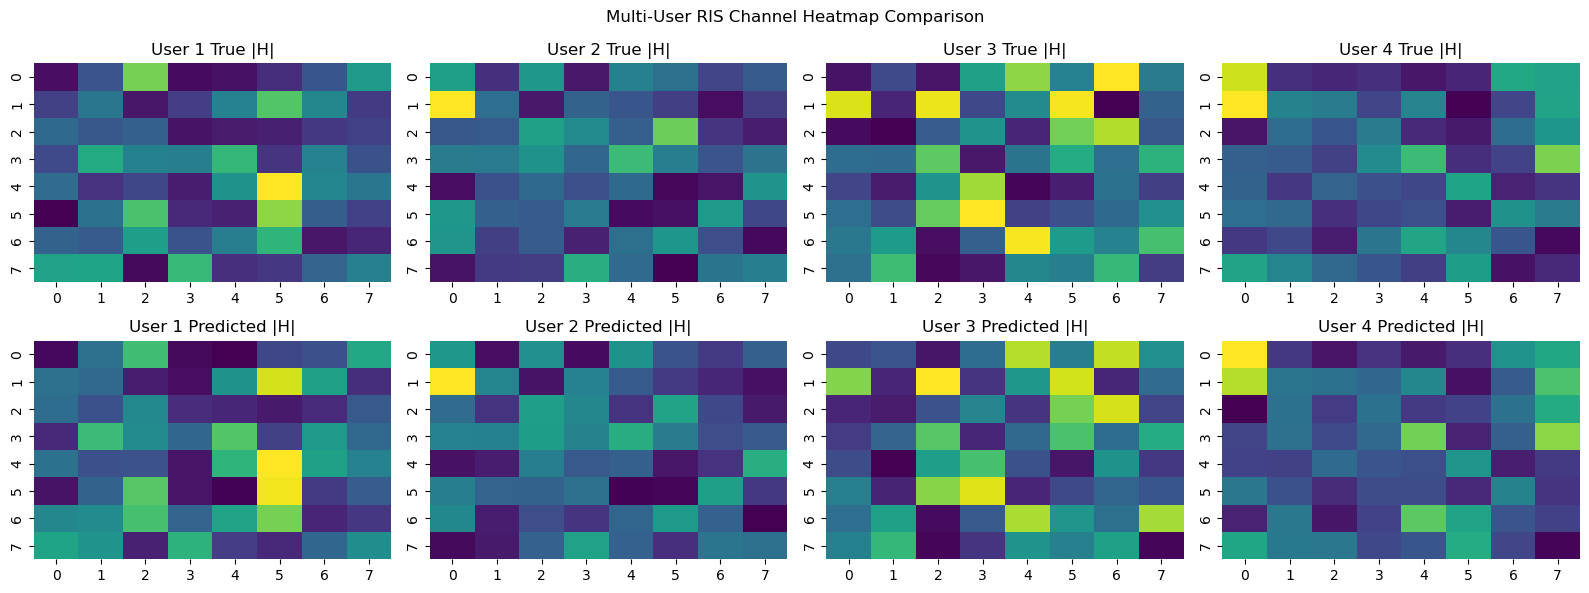

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_multi_user_heatmaps(true_H, pred_H, U=4):
    assert true_H.shape == pred_H.shape and true_H.shape[1] == 64, "Shape must be (U, 64)"
    fig, axes = plt.subplots(2, U, figsize=(4 * U, 6))

    for u in range(U):
        H_true_reshaped = np.abs(true_H[u].reshape(8, 8))
        H_pred_reshaped = np.abs(pred_H[u].reshape(8, 8))
        sns.heatmap(H_true_reshaped, ax=axes[0, u], cbar=False, cmap='viridis')
        axes[0, u].set_title(f"User {u+1} True |H|")
        sns.heatmap(H_pred_reshaped, ax=axes[1, u], cbar=False, cmap='viridis')
        axes[1, u].set_title(f"User {u+1} Predicted |H|")

    plt.suptitle("Multi-User RIS Channel Heatmap Comparison")
    plt.tight_layout()
    plt.show()

# 👇 Try it with dummy data
U = 4
true_H_array = np.random.randn(U, 64)
pred_H_array = true_H_array + np.random.normal(0, 0.2, size=(U, 64))

plot_multi_user_heatmaps(true_H_array, pred_H_array, U=U)


In [46]:
print(true_H_array.shape)
print(pred_H_array.shape)


(4, 64)
(4, 64)
